<a href="https://colab.research.google.com/github/Aliksm-DataScientist/Customer_chrun_first_project/blob/Customer_Churn/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
%matplotlib inline

In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.tail()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
newDataSet = df.drop(columns=['customerID', 'Dependents', 'MultipleLines'], axis=1)

In [7]:
newDataSet.sample(2)

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6631,Male,0,Yes,25,Yes,DSL,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),55.55,1405.3,No
476,Male,1,Yes,35,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,76.05,2747.2,No


In [8]:
newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


In [9]:
''' 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   object
 3   tenure            7043 non-null   int64
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  MonthlyCharges    7043 non-null   float64
 17  TotalCharges      7043 non-null   object
 18  Churn

 '''

' 0   gender            7043 non-null   object\n 1   SeniorCitizen     7043 non-null   int64\n 2   Partner           7043 non-null   object\n 3   tenure            7043 non-null   int64\n 4   PhoneService      7043 non-null   object\n 5   MultipleLines     7043 non-null   object\n 6   InternetService   7043 non-null   object\n 7   OnlineSecurity    7043 non-null   object\n 8   OnlineBackup      7043 non-null   object\n 9   DeviceProtection  7043 non-null   object\n 10  TechSupport       7043 non-null   object\n 11  StreamingTV       7043 non-null   object\n 12  StreamingMovies   7043 non-null   object\n 13  Contract          7043 non-null   object\n 14  PaperlessBilling  7043 non-null   object\n 15  PaymentMethod     7043 non-null   object\n 16  MonthlyCharges    7043 non-null   float64\n 17  TotalCharges      7043 non-null   object\n 18  Churn\n\n '

In [10]:
newDataSet['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [11]:
newDataSet['Partner'].replace({'No': 0, 'Yes': 1}, inplace=True)
listOfArrayOfYesNo = ['Partner', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for x in listOfArrayOfYesNo:
    newDataSet[x].replace({'No': 0, 'Yes': 1}, inplace=True)


listOfArrayWHichConsistOfNoInternetService = ['TechSupport', 'StreamingTV', 'StreamingMovies', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
for x in listOfArrayWHichConsistOfNoInternetService:
    newDataSet[x].replace({'No internet service': 0}, inplace=True)
newDataSet['gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
newDataSet.sample(2)
newDataSet['InternetService'].value_counts()


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [13]:
listOfArrayForOrdinalEncoding = ['PaymentMethod', 'InternetService', 'Contract',]

for x in listOfArrayForOrdinalEncoding:
  newDataSet[x] = enc.fit_transform(newDataSet[[x]])

#newDataSet['InternetService'] = enc.fit_transform(newDataSet[['InternetService']])
newDataSet

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,0,0.0,0,1,0,0,0,0,0.0,1,2.0,29.85,29.85,No
1,0,0,0,34,1,0.0,1,0,1,0,0,0,1.0,0,3.0,56.95,1889.5,No
2,0,0,0,2,1,0.0,1,1,0,0,0,0,0.0,1,3.0,53.85,108.15,Yes
3,0,0,0,45,0,0.0,1,0,1,1,0,0,1.0,0,0.0,42.30,1840.75,No
4,1,0,0,2,1,1.0,0,0,0,0,0,0,0.0,1,2.0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,1,0.0,1,0,1,1,1,1,1.0,1,3.0,84.80,1990.5,No
7039,1,0,1,72,1,1.0,0,1,1,0,1,1,1.0,1,1.0,103.20,7362.9,No
7040,1,0,1,11,0,0.0,1,0,0,0,0,0,0.0,1,2.0,29.60,346.45,No
7041,0,1,1,4,1,1.0,0,0,0,0,0,0,0.0,1,3.0,74.40,306.6,Yes


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
x = newDataSet.iloc[:, : - 1]
y = newDataSet['Churn']
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [16]:
for col in ['Contract', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TotalCharges', 'PaymentMethod']:
  print(f'x Unique Data => {x[col].value_counts()}')

x Unique Data => Contract
0.0    3875
2.0    1695
1.0    1473
Name: count, dtype: int64
x Unique Data => InternetService
1.0    3096
0.0    2421
2.0    1526
Name: count, dtype: int64
x Unique Data => OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
x Unique Data => OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
x Unique Data => DeviceProtection
0    4621
1    2422
Name: count, dtype: int64
x Unique Data => TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64
x Unique Data => PaymentMethod
2.0    2365
3.0    1612
0.0    1544
1.0    1522
Name: count, dtype: int64


In [17]:
x.tail()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,0,0,1,24,1,0.0,1,0,1,1,1,1,1.0,1,3.0,84.80,1990.5
7039,1,0,1,72,1,1.0,0,1,1,0,1,1,1.0,1,1.0,103.20,7362.9
7040,1,0,1,11,0,0.0,1,0,0,0,0,0,0.0,1,2.0,29.60,346.45
7041,0,1,1,4,1,1.0,0,0,0,0,0,0,0.0,1,3.0,74.40,306.6
7042,0,0,0,66,1,1.0,1,0,1,1,1,1,2.0,1,0.0,105.65,6844.5


In [18]:
#scledData = scaler.fit_transform(x)
x.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
tenure,int64
PhoneService,int64
InternetService,float64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


In [19]:
import math

arrayOfFlotFeatures = x.select_dtypes(include='float64').columns
for featureName in arrayOfFlotFeatures:
  print(f'Feture Name is = {featureName} {np.floor(x[featureName])}')
  x[featureName] = np.floor(x[featureName]).astype(int)

Feture Name is = InternetService 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    1.0
7040    0.0
7041    1.0
7042    1.0
Name: InternetService, Length: 7043, dtype: float64
Feture Name is = Contract 0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
7038    1.0
7039    1.0
7040    0.0
7041    0.0
7042    2.0
Name: Contract, Length: 7043, dtype: float64
Feture Name is = PaymentMethod 0       2.0
1       3.0
2       3.0
3       0.0
4       2.0
       ... 
7038    3.0
7039    1.0
7040    2.0
7041    3.0
7042    0.0
Name: PaymentMethod, Length: 7043, dtype: float64
Feture Name is = MonthlyCharges 0        29.0
1        56.0
2        53.0
3        42.0
4        70.0
        ...  
7038     84.0
7039    103.0
7040     29.0
7041     74.0
7042    105.0
Name: MonthlyCharges, Length: 7043, dtype: float64


In [20]:
x.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
tenure,int64
PhoneService,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


In [21]:
x.isnull().any()

,0
gender,False
SeniorCitizen,False
Partner,False
tenure,False
PhoneService,False
InternetService,False
OnlineSecurity,False
OnlineBackup,False
DeviceProtection,False
TechSupport,False


In [22]:
for column in x.columns:
    empty_values = (x[column] == ' ').sum()
    if empty_values > 0:
        print(f"Column '{column}' has {empty_values} empty string values.")

Column 'TotalCharges' has 11 empty string values.


In [23]:
x['TotalCharges'] = x['TotalCharges'].replace(' ', 0)

In [24]:
x['TotalCharges'] = x['TotalCharges'].astype(float)

In [25]:
x['TotalCharges'].dtype

dtype('float64')

In [26]:
for featureName in ['TotalCharges']:
  x[featureName] = np.floor(x[featureName]).astype(int)
x['TotalCharges'].dtype

dtype('int64')

In [27]:
scaledData = scaler.fit_transform(x)
scaledData

array([[1.        , 0.        , 1.        , ..., 0.66666667, 0.11      ,
        0.00333947],
       [0.        , 0.        , 0.        , ..., 1.        , 0.38      ,
        0.21752649],
       [0.        , 0.        , 0.        , ..., 1.        , 0.35      ,
        0.01243667],
       ...,
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.11      ,
        0.03984339],
       [0.        , 1.        , 1.        , ..., 1.        , 0.56      ,
        0.03523722],
       [0.        , 0.        , 0.        , ..., 0.        , 0.87      ,
        0.78811608]])

In [28]:
newData = pd.DataFrame(scaledData, columns=x.columns)
newData.sample(2)

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
469,1.0,0.0,1.0,0.180556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.37,0.084523
973,0.0,1.0,1.0,0.611111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.12,0.156495


In [29]:
x.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
tenure,int64
PhoneService,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


In [30]:
import seaborn as sn

<ipython-input-31-aedb25039b9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  res = sn.distplot(newData)


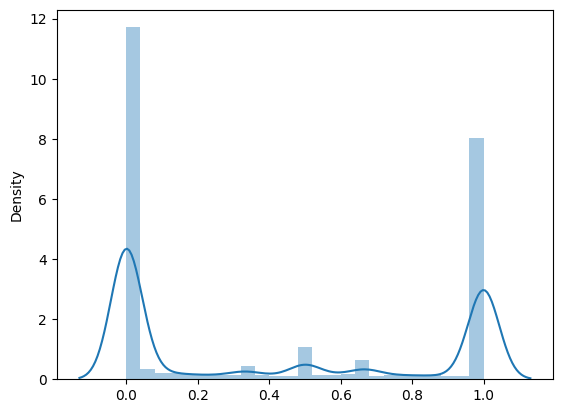

In [31]:
res = sn.distplot(newData)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5e05bc1210>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5e05bc1750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5e05bc0f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5e05bc1c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5e05bc1f30>],
 'means': []}

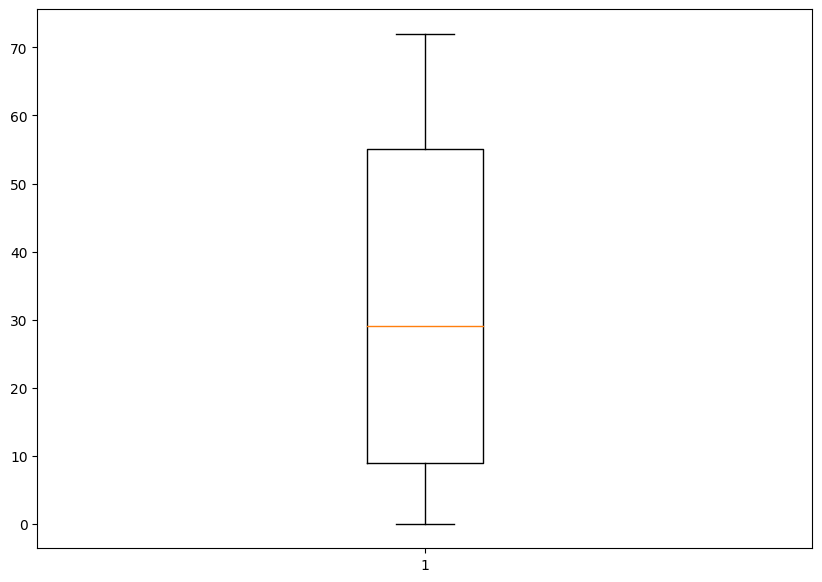

In [32]:
data = x['tenure']

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

In [33]:
yData = y.replace({'Yes': 1, 'No': 0})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    newData, yData, test_size=0.2, random_state=42)
X_train.sample(2)

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6791,0.0,0.0,0.0,0.263889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.21,0.084408
3212,0.0,0.0,1.0,0.555556,1.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.62,0.364809


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'random_state': [1, 2, 0, 20]
}

#reg = LinearRegression().fit(X_train, y_train)
reg = RandomForestClassifier(max_depth=9,random_state=0).fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
#reg = GridSearchCV(RandomForestClassifier(), param_grid)
#reg.fit(X_train, y_train)
#print(reg.best_estimator_)

0.850550230741924
0.8055358410220014


In [104]:
#reg.predict(X_test, y_test)
#row_values = X_test.iloc[2].tolist()
X_test.shape
row_values = X_test.iloc[3].tolist()
print(row_values)
# Print the row values
#print(row_values)

[1.0, 0.0, 0.0, 0.013888888888888888, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.5800000000000001, 0.008751727314601566]


In [99]:

y_test.head(20)

,Churn
185,1
2715,0
3825,0
1807,1
132,0
1263,1
3732,0
1672,0
811,1
2526,1


In [100]:
y_pred = reg.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'here is the confusion Matrix = {cm}')
print(accuracy_score(y_test, y_pred))


here is the confusion Matrix = [[946  90]
 [184 189]]
0.8055358410220014


In [105]:
reg.predict([[1.0, 0.0, 0.0, 0.013888888888888888, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.5800000000000001, 0.008751727314601566]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])